> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


# 5.1. Accelerating pure Python code with Numba and Just-In-Time compilation

In this example, we first write a pure Python version of a function that generates a Mandelbrot fractal. Then, we use Numba to compile it dynamically to native code.

In [1]:
import numpy as np

We initialize the simulation and generate the grid
in the complex plane.

In [6]:
size = 500
iterations = 100

## Pure Python version

The following function generates the fractal.

In [3]:
def mandelbrot_python(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [7]:
m = np.zeros((size, size))
mandelbrot_python(m, size, iterations)

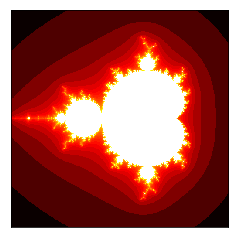

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(np.log(m), cmap=plt.cm.hot,);
plt.xticks([]); plt.yticks([]);

In [6]:
%%timeit m = np.zeros((size, size))
mandelbrot_python(m, size, iterations)

1 loops, best of 3: 5.01 s per loop


## Numba version

We first import Numba.

In [7]:
import numba
from numba import jit, complex128

Now, we just add the `@jit` decorator to the exact same function.

In [8]:
@jit(locals=dict(c=complex128, z=complex128))
def mandelbrot_numba(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

In [9]:
m = np.zeros((size, size))
mandelbrot_numba(m, size, iterations)

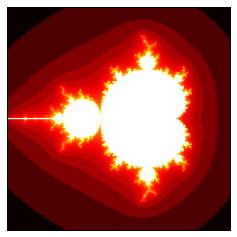

In [10]:
plt.imshow(np.log(m), cmap=plt.cm.hot,);
plt.xticks([]); plt.yticks([]);

In [11]:
%%timeit m = np.zeros((size, size))
mandelbrot_numba(m, size, iterations)

100 loops, best of 3: 12.4 ms per loop


The Numba version is 250 times faster than the pure Python version here!

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).

In [1]:
from numba import jit
from numpy import arange

# jit decorator tells Numba to compile this function.
# The argument types will be inferred by Numba when function is called.
@jit
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

a = arange(9).reshape(3,3)
print(sum2d(a))

36.0
